## Introduction to Text Mining & Natural Language Processing (NLP)

* Language is the way of communication and knowledge transfering. 
* There are many languages in the world. 
    - Different standards, alphabets, grammars, etc
* Text is a serialization of the information in languages. The way the text is constructured is for human brain, not for computers.
* Only 20 percent of the data is in the structured format such as tweets, Emails, Facebook, Instagram, or any text messages.
* The majority of texts are in unstructured format.


### What is Text Mining?

* Text mining is preprocessing, feature engineering and analytics for textual data.
* Text mining (a.k.a. text analytics) transforms the unstructured text into normalized, structured data suitable for analysis or machine learning algorithms.
* The process of examining large collections of documents to discover new information or help answer specific research questions

The basic steps for text mining:

* Text mining extracts useful information from massive textual big data. 
* Then the information is converted into a structured format.
* The structured data created by text mining can be used for descriptive, prescriptive or predictive analytics.
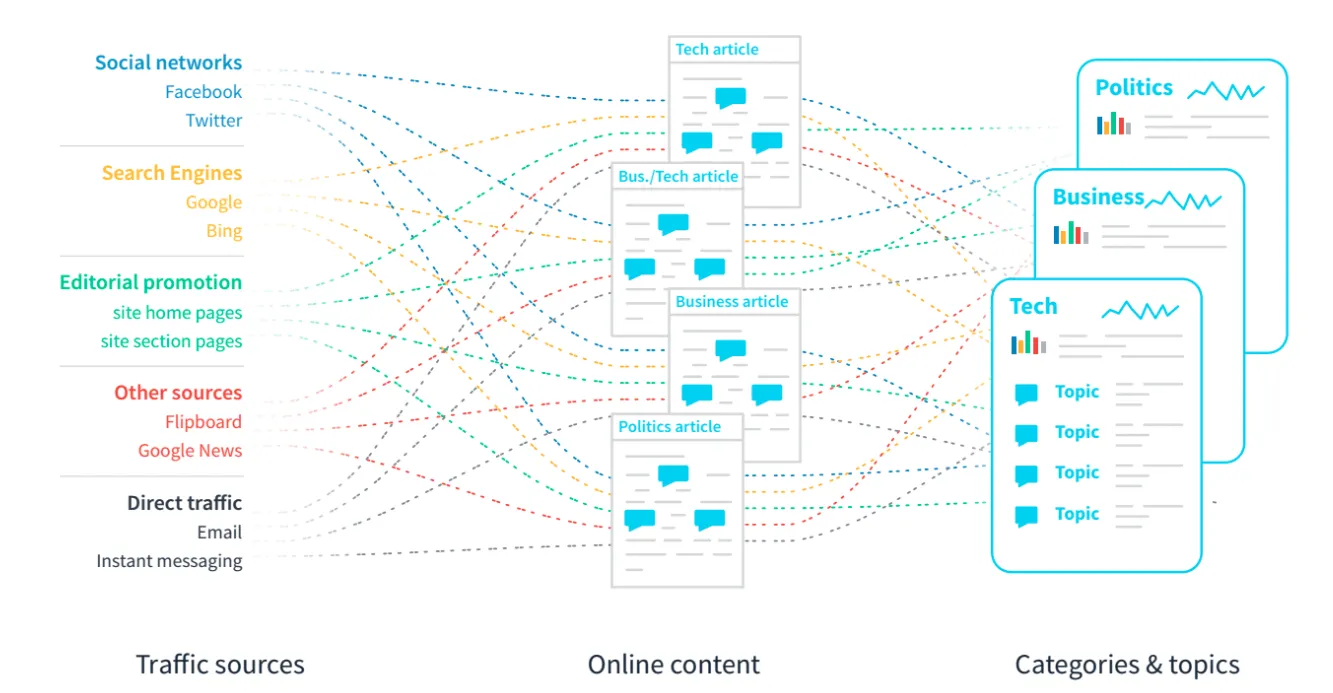

### What is Natural Language Processing (NLP)?

* One of the most important of predictive analytics is Natural Language Processing (NLP).
* NLP is a component of text mining
* NLP helps computers understand, analyze, manipulate, and potentially generate human language.
    - Siri, Alexa and Google's voice search use NLP to receive and respond to user requests.
    - Text mining applications have also been developed in medical research, customer services, fraud detection in insurance industry, contextual advertising, financial analysis, detect spam emails, autocorrect, etc
    - Real-time massive news sentiment analysis and news-driven trading
    - Topic Analysis and Clustering
    - Spam Filtering:  Detect unsolicited and unwanted email/messages.
    - Language Translation: Translation of a sentence from one language to another.
    
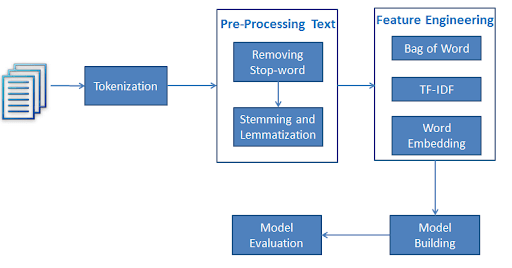

### Natural Language Toolkit (NLTK) and other tools

* open-source package in Python. 
* provides all common NLP Tasks from tokenization, stemming, tagging, parsing, and beyond.
* Other useful tools
    - BeautifulSoup: Library for extracting data from HTML and XML documents

#### A first taste of NLTK

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\David
[nltk_data]     Li\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#this didn't work on my Jupyter. It should work in command line. It is better to use nltk.download('name of resource')
# nltk.download() 

### The general approach to preprocessing text data with NLTK

The following diagram shows the general idea of the preprocessing pipeline from text (e.g., books, articles, news) to a list of words:


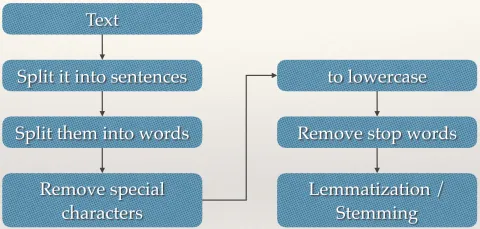

This pipeline can be more generalized to: Text -> Tokenization -> Normalization -> A list of words. Let’s look at details step by step.

### Preprocessing Data 1: Cleaning up and structuring

#### Remove punctuation

* Punctuation can provide grammatical context to a sentence which supports our understanding. 
    - Classic chinese doesn't have punctuations. It indicates that they are helpful but not absolutely necessary.
* But for our vectorizer which counts the number of words and not the context, it does not add value.
* So we remove all special characters. 

In [3]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
mytext="Text mining (a.k.a. text analytics) transforms the unstructured text into normalized, structured data suitable for analysis or machine learning algorithms."
mytext

'Text mining (a.k.a. text analytics) transforms the unstructured text into normalized, structured data suitable for analysis or machine learning algorithms.'

In [5]:
"".join([char for char in mytext if char not in string.punctuation])

'Text mining aka text analytics transforms the unstructured text into normalized structured data suitable for analysis or machine learning algorithms'

In [6]:
remove_punct=lambda x: "".join([char for char in x if char not in string.punctuation])

mytext=remove_punct(mytext)

#### Tokenization

* Tokenizing separates text into units such as sentences or words. 
* It generates a list structure of unstructured text
* It is also referred to as text segmentation or lexical analysis.
* The general approach works well for any language that uses space as delimiter.
* For those languages that don't use space delimiter, the options can be
    * greedy algorithm: It always looks for the longest word in the dictionary that matches the input, one at a time
    * Tokenizing ancient language poem will be challenging.
    * Won't work well on new words.
    * Build ML algorithms to tokenize. 
    * and many other algorithms based on stats and deep learning

In [7]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(mytext.lower())  #We convert to lower as Python is case-sensitive. 
print(tokens)

['text', 'mining', 'aka', 'text', 'analytics', 'transforms', 'the', 'unstructured', 'text', 'into', 'normalized', 'structured', 'data', 'suitable', 'for', 'analysis', 'or', 'machine', 'learning', 'algorithms']


#### Remove stopwords

* Stopwords are common words that will likely appear in any text. 
* They usually don't have much useful information of our data so we remove them

In [8]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w for w in tokens if not w in stop_words]
print(tokens)

['text', 'mining', 'aka', 'text', 'analytics', 'transforms', 'unstructured', 'text', 'normalized', 'structured', 'data', 'suitable', 'analysis', 'machine', 'learning', 'algorithms']


In [9]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Preprocessing Data 2: Stemming and Lemmatization in Python

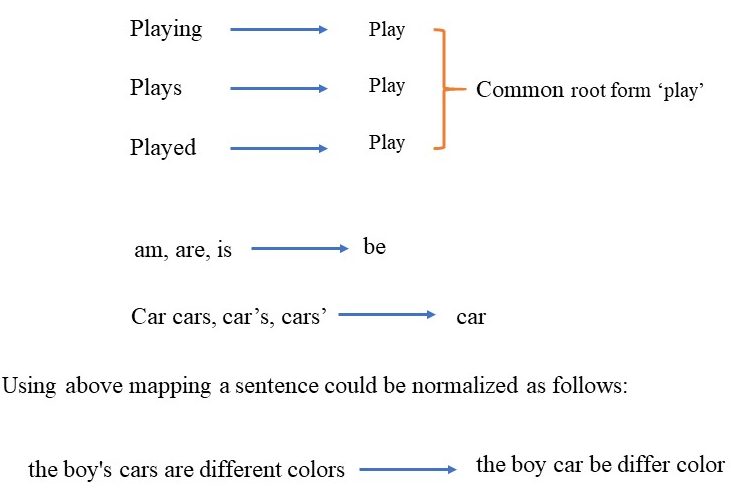

<font color='red'>Question: What is it called in feature engineering?</font>

### Stemming

* A simple rule-based approach
    - It reduces the corpus of words but often the actual words get neglected. eg: Entitling,Entitled->Entitl
* Stemming helps reduce a word to its stem form. 
* It often makes sense to treat related words in the same way. 
* It removes suffices, like “ing”, “ly”, “s”, etc
* NLTK provides several stemmer interfaces like 
    - Porter stemmer
    - Lancaster Stemmer
    - Snowball Stemmer

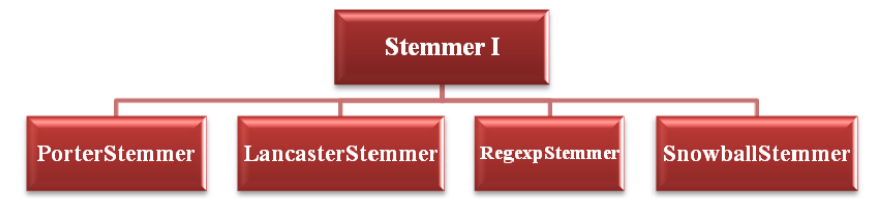

#### Try different stemmers

* For the English language, you can choose between PorterStammer or LancasterStammer
* PorterStemmer being the oldest one originally developed in 1979. 
* LancasterStemmer was developed in 1990 and uses a more aggressive approach than Porter Stemming Algorithm.
* Python nltk introduced SnowballStemmers that are used to create non-English Stemmers, so that you can generate your own set of rules for any languages. 

#### PorterStemmer

* Most commonly used stemmer
* PorterStemmer uses Suffix Stripping to produce stems
* Notice how the PorterStemmer is giving the root (stem) of the word "algorithms" by simply removing the 's' after "algorithm"
* This is the reason why PorterStemmer does not often generate stems that are actual English words. 
    - It does not keep a lookup table for actual stems of the word but applies algorithmic rules to generate stems.
* PorterStemmer is known for its simplicity and speed but not very precise.

In [10]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
stems=[porter.stem(t) for t in tokens]
stems
# 'analyt', 'unstructur', 'suitabl' are not actual words

['text',
 'mine',
 'aka',
 'text',
 'analyt',
 'transform',
 'unstructur',
 'text',
 'normal',
 'structur',
 'data',
 'suitabl',
 'analysi',
 'machin',
 'learn',
 'algorithm']

#### LancasterStemmer

* The LancasterStemmer (Paice-Husk stemmer) is an iterative algorithm with rules saved externally. 
* lancaster stemmer is significantly more aggressive than the porter stemmer
* Algorithm:
    * One table containing about 120 rules indexed by the last letter of a suffix. 
    * On each iteration, it tries to find an applicable rule by the last character of the word.
    * Each rule specifies either a deletion or replacement of an ending. 
    * If there is no such rule, it terminates. 
    * It also terminates if a word starts with a vowel and there are only two letters left or if a word starts with a consonant and there are only three characters left. 
    * Otherwise, the rule is applied, and the process repeats.

* Cons
    * LancasterStemmer is simple, but heavy stemming due to iterations and over-stemming may occur. 
    * Over-stemming causes the stems to be not linguistic, or they may have no meaning.

In [11]:
from nltk.stem import LancasterStemmer
lancaster=LancasterStemmer()
[lancaster.stem(t) for t in tokens]
# 'min', 'dat' are words but they are overstemmed.

['text',
 'min',
 'ak',
 'text',
 'analys',
 'transform',
 'unstruct',
 'text',
 'norm',
 'structured',
 'dat',
 'suit',
 'analys',
 'machin',
 'learn',
 'algorithm']

#### Snowball Stemmer

* The actual name of this stemmer is English Stemmer or Porter2 Stemmer
* There were some improvements done on Porter Stemmer which made it more precise over large data-sets
* It is an improvement over Porter Stemmer.
* Slightly faster computation time than porter, with a fairly large community around it.

In [12]:
from nltk.stem.snowball import SnowballStemmer
snowBallStemmer = SnowballStemmer("english")
[snowBallStemmer.stem(word) for word in tokens]

['text',
 'mine',
 'aka',
 'text',
 'analyt',
 'transform',
 'unstructur',
 'text',
 'normal',
 'structur',
 'data',
 'suitabl',
 'analysi',
 'machin',
 'learn',
 'algorithm']

In [13]:
snowBallStemmer.languages

('arabic',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'hungarian',
 'italian',
 'norwegian',
 'porter',
 'portuguese',
 'romanian',
 'russian',
 'spanish',
 'swedish')

#### Compare stemmers side by side

In [14]:
from IPython.core.display import display, HTML
display(HTML("<b>{0:20}&emsp;&emsp;&emsp;{1:20}&emsp;&emsp;&emsp;{2:20}&emsp;&emsp;&emsp;{3:20}</b>".format("Word","PorterStemmer","LancasterStemmer", "SnowballStemmer")))
for word in tokens:
    print("{0:20}{1:20}{2:20}{3:20}".format(word,porter.stem(word),lancaster.stem(word), snowBallStemmer.stem(word)))

text                text                text                text                
mining              mine                min                 mine                
aka                 aka                 ak                  aka                 
text                text                text                text                
analytics           analyt              analys              analyt              
transforms          transform           transform           transform           
unstructured        unstructur          unstruct            unstructur          
text                text                text                text                
normalized          normal              norm                normal              
structured          structur            structured          structur            
data                data                dat                 data                
suitable            suitabl             suit                suitabl             
analysis            analysi 

#### Which stemmer to choose?

* Porter has the most implementations though and so is usually the default go-to algorithm
* Lancaster may hugely trim down your working set, which can be very useful, with the marginal speed increase
* Snowball is very similar to "Porter Stemmer" but with slightly improved rules. If you are performing comparisons for research "Porter" (original) is used far more often, but if you want practical accuracy stick with Snowball.

### Lemmatization

* Lemmatizing derives the canonical form (‘lemma’) of a word. i.e the root form. 
* It is better than stemming as it uses a dictionary-based approach i.e a morphological analysis to the root word


#### Lemmatization vs Stemming

Stemming

* Stemmers (usually) simply chop off endings in an attempt to eliminate relatively meaningless part
* While useful for their speed and simplicity, they suffer from an overly simplistic approach to manipulating words that results in many disconnected similar words

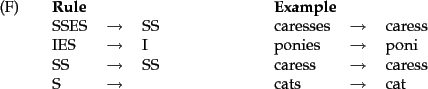


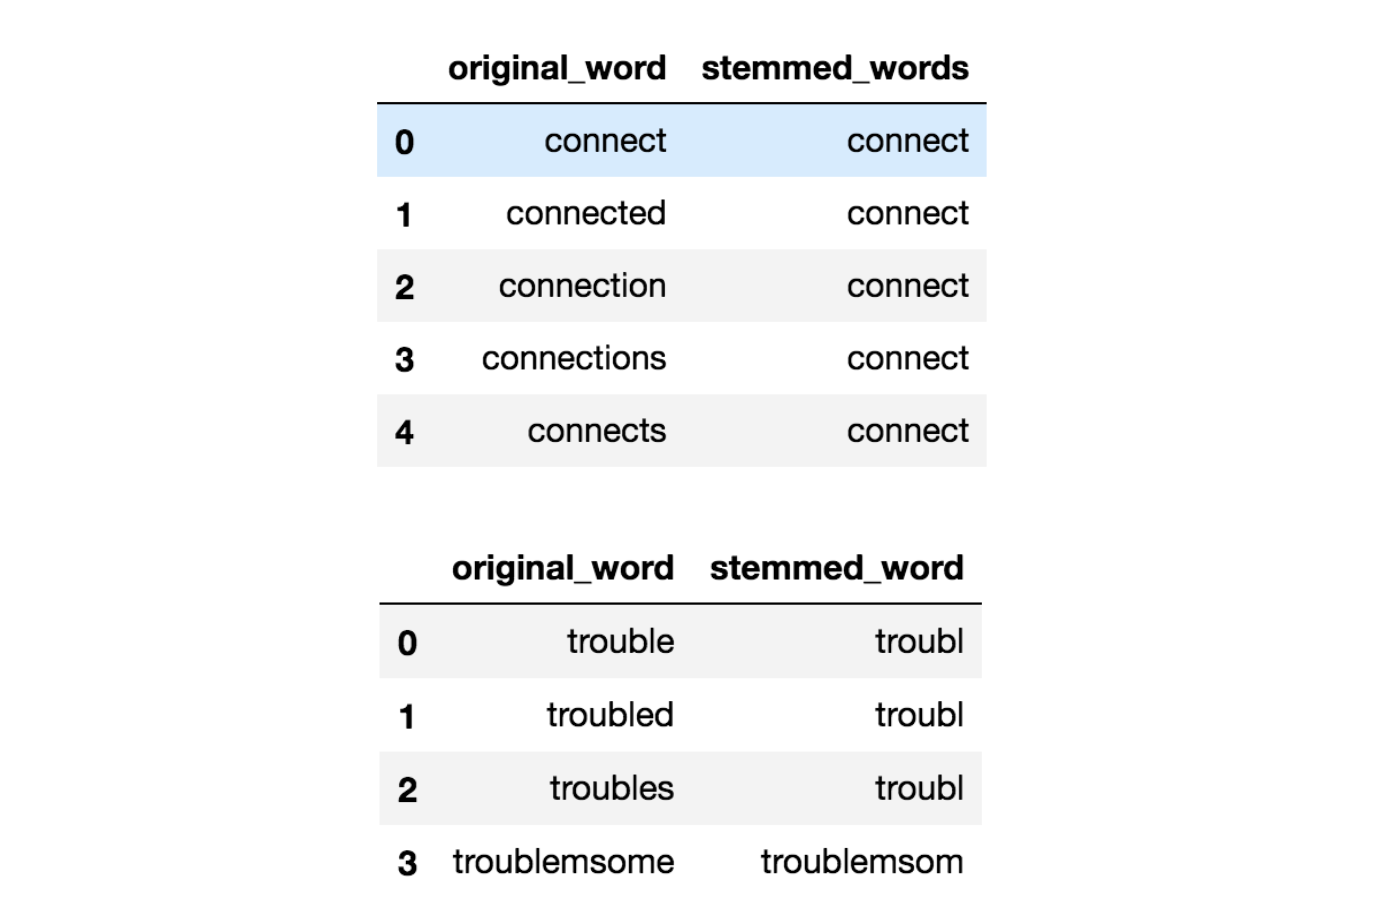

Lemmatization

* Seek to capture the “lemma” or core/root of a word by looking through relationships in dictionaries. 
* With lemmatizers, relationships like that between better and good are accurately captured, so they’re very useful when accuracy is needed.
* link together related words of different parts of speech, first detecting the part of speech (with error) and then traversing the web of derivationally related forms (and synsets and pertainyms, etc.) until one decides on a “root” form

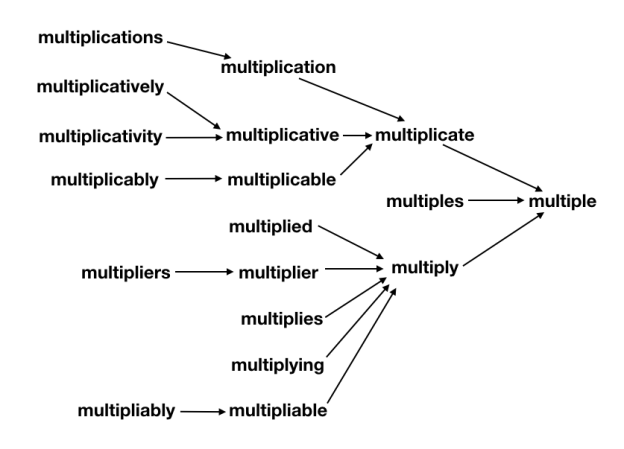

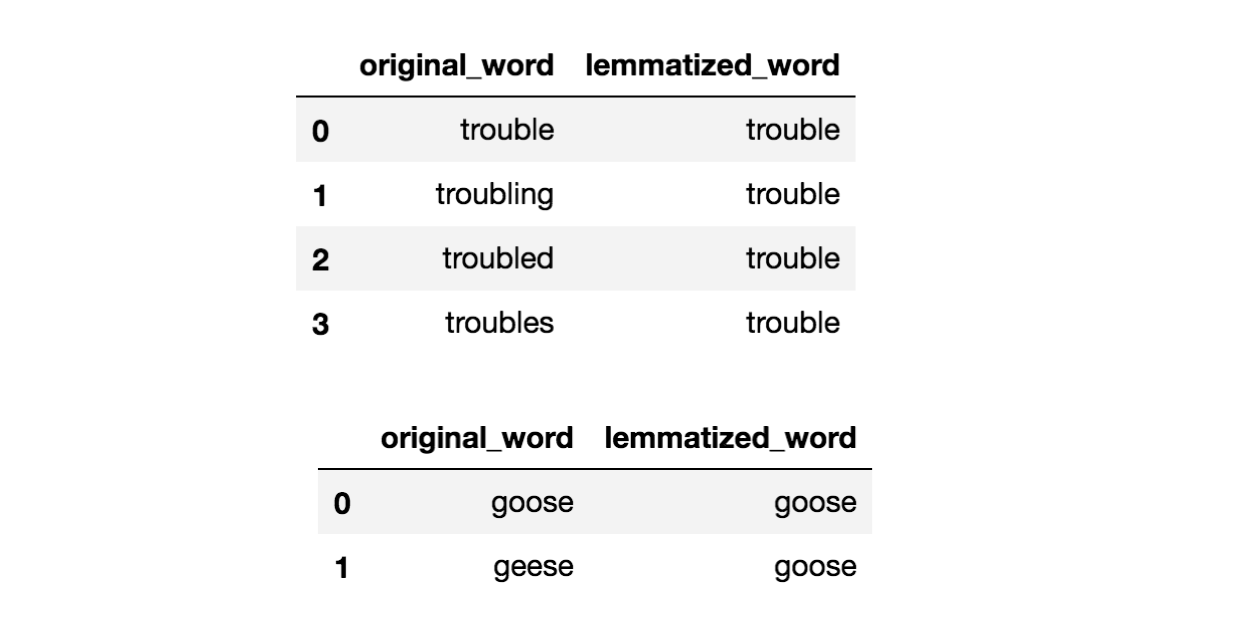

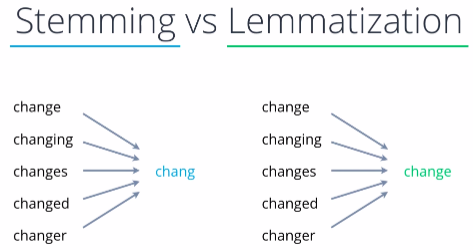

* In Short, Stemming is typically faster as it simply chops off the end of the word, without understanding the context of the word. 
* Lemmatizing is slower and more accurate as it takes an informed analysis with the context of the word in mind.
* Many tools for lemmatization
    - <b>Wordnet Lemmatizer</b>
    - Spacy Lemmatizer
    - TextBlob
    - CLiPS Pattern
    - Stanford CoreNLP
    - Gensim Lemmatizer
    - TreeTagger

### Wordnet Lemmatizer

* Wordnet is an large, freely and publicly available lexical database for the English language aiming to establish structured semantic relationships between words. 
* It offers lemmatization capabilities as well and is one of the earliest and most commonly used lemmatizers.
* NLTK offers an interface to it, but you have to download it first in order to use it. 

In [15]:
wn = nltk.WordNetLemmatizer()
[wn.lemmatize(word) for word in tokens]

['text',
 'mining',
 'aka',
 'text',
 'analytics',
 'transforms',
 'unstructured',
 'text',
 'normalized',
 'structured',
 'data',
 'suitable',
 'analysis',
 'machine',
 'learning',
 'algorithm']

#### Wordnet Lemmatizer with appropriate POS tag

* part-of-speech (POS)
* the same word can have multiple different 'lemma's
* Parts of speech Tagging is responsible for reading the text in a language and assigning some specific token (Parts of Speech) to each word.
* So, based on the context it’s used, you should identify the ‘part-of-speech’ (POS) tag for the word in that specific context and extract the appropriate lemma

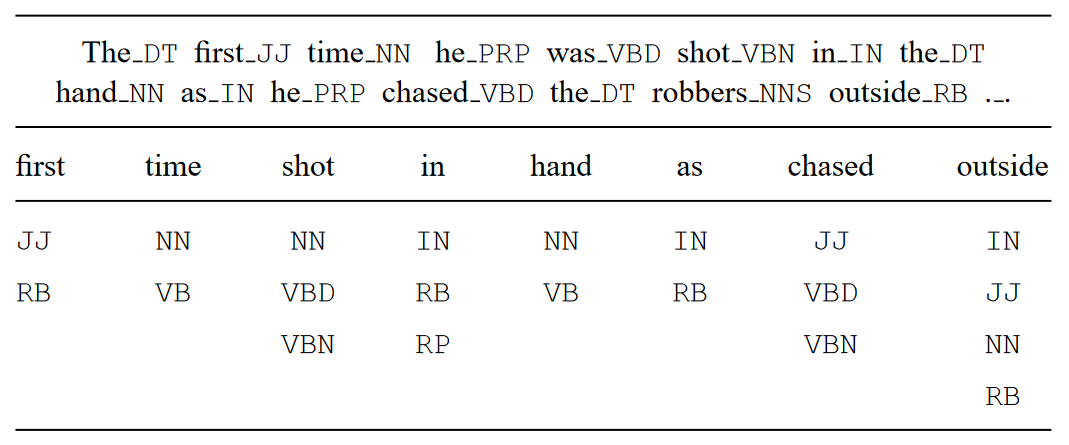

Some common tags

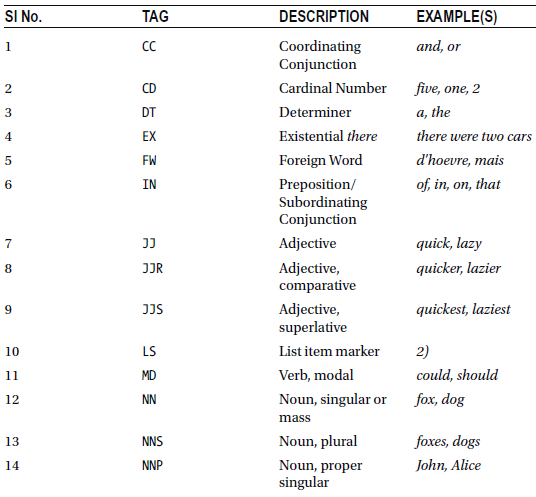

#### How does POS tag work?

* A POS tagger takes in a phrase or sentence and assigns the most probable part-of-speech tag to each word
* The set of predefined tags is called the tagset.
    - Example tags are NNS for a plural noun, 
    - VBD for a past tense verb
    - JJ for an adjective
* POS tagging itself is a challenging ML project
    - Rule-Based
    - Statistical such as Hidden Markov Model (HMM)
    - Neural network
    - etc

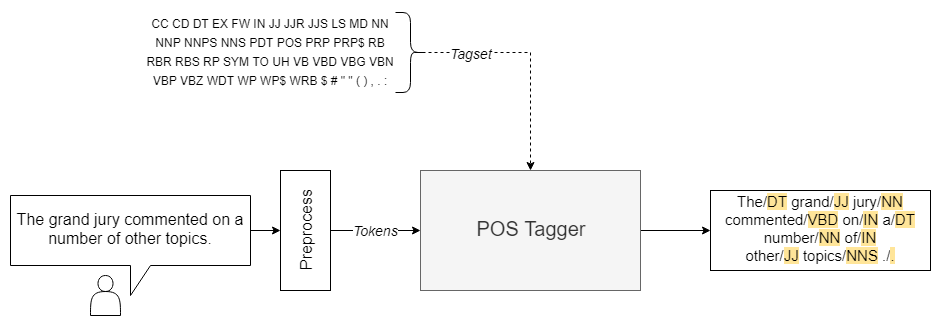

#### Fortunately NLTK provides pos_tag which is a machine-learning tagger that has been trained and saved for you. 

In [16]:
nltk.download('averaged_perceptron_tagger') # you need to download in order to use pos_tag

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\David Li\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [17]:
from nltk import pos_tag
pos_tag(['feet'])

[('feet', 'NNS')]

#### nltk.pos_tag() returns a tuple with the POS tag. The key here is to map NLTK’s POS tags to the format wordnet lemmatizer would accept. 

In [18]:
pos_tag(tokens)

[('text', 'NN'),
 ('mining', 'NN'),
 ('aka', 'NN'),
 ('text', 'NN'),
 ('analytics', 'NNS'),
 ('transforms', 'NNS'),
 ('unstructured', 'VBD'),
 ('text', 'JJ'),
 ('normalized', 'JJ'),
 ('structured', 'VBN'),
 ('data', 'NNS'),
 ('suitable', 'JJ'),
 ('analysis', 'NN'),
 ('machine', 'NN'),
 ('learning', 'VBG'),
 ('algorithms', 'NNS')]

In [19]:
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [20]:
[wn.lemmatize(w, get_wordnet_pos(w)) for w in tokens]
# POS helps to lemmatize 'learning' to 'learn'

['text',
 'mining',
 'aka',
 'text',
 'analytics',
 'transforms',
 'unstructured',
 'text',
 'normalize',
 'structure',
 'data',
 'suitable',
 'analysis',
 'machine',
 'learn',
 'algorithm']

In [21]:
from IPython.core.display import display, HTML
display(HTML("<b>{0:20}&emsp;&emsp;&emsp;{1:20}&emsp;&emsp;&emsp;{2:20}&emsp;&emsp;&emsp;{3:20}&emsp;&emsp;&emsp;{4:20}</b>"
             .format("Word","PorterStemmer","LancasterStemmer", "SnowballStemmer", "WordNetLemmatizer")))
for word in tokens:
    print("{0:20}{1:20}{2:20}{3:20}{4:20}".format(word,porter.stem(word),
                                                  lancaster.stem(word), 
                                                  snowBallStemmer.stem(word), 
                                                  wn.lemmatize(word, get_wordnet_pos(word))))

text                text                text                text                text                
mining              mine                min                 mine                mining              
aka                 aka                 ak                  aka                 aka                 
text                text                text                text                text                
analytics           analyt              analys              analyt              analytics           
transforms          transform           transform           transform           transforms          
unstructured        unstructur          unstruct            unstructur          unstructured        
text                text                text                text                text                
normalized          normal              norm                normal              normalize           
structured          structur            structured          structur            structure  

### Feature Engineering: Vectorizing Data

* words of the text represent discrete, categorical features.
* Algorithms are usually not good for those features.
* Vectorizing is the mapping from textual data to real valued vectors 
* Encode text as integers i.e. numeric form to create feature vectors so that machine learning algorithms can understand our data.
* Several options
    * Bag-Of-Words (BOW)
    * N-Grams
    * TF-IDF

#### 1. Simple Bag of Words (BOW): 

* We make the list of unique words in the text corpus called vocabulary. 
* Then we can represent each sentence or document as a vector with each word represented as 1 for present and 0 for absent from the vocabulary. 
* Another representation can be count the number of times each word appears in a document. 

#### sklearn.feature_extraction.text.CountVectorizer

* Convert a collection of text documents to a matrix of token counts
* If you do not provide an a-priori dictionary and you do not use an analyzer that does some kind of feature selection then the number of features will be equal to the vocabulary size found by analyzing the data.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


#### Combine stemming/lemmatizing with CountVectorizer

In [23]:
corpus=["The LancasterStemmer (Paice-Husk stemmer) is an iterative algorithm with rules saved externally.",
        "Text mining (a.k.a. text analytics) transforms the unstructured text into normalized, structured data suitable for analysis or machine learning algorithms.",
        "It is an improvement over Porter Stemmer hence we can see in the results how gracefully it handled input. There was lots of improvement done in this algorithm.",
       "Python nltk introduced SnowballStemmers that are used to create non-English Stemmers, so that you can generate your own set of rules for any languages."
       ]

corpus=map(remove_punct, corpus) #Remove punctuation

corpus=list(map(lambda i: word_tokenize(i.lower()), corpus)) # Tokenization

corpus=[[w for w in tokens if not w in stop_words] for tokens in corpus]# Remove stopwords

# corpus=[[snowBallStemmer.stem(word) for word in tokens] for tokens in corpus] # Stemming

corpus=[[wn.lemmatize(word, get_wordnet_pos(word)) for word in tokens] for tokens in corpus] # Lemmatizing

corpus

[['lancasterstemmer',
  'paicehusk',
  'stemmer',
  'iterative',
  'algorithm',
  'rule',
  'save',
  'externally'],
 ['text',
  'mining',
  'aka',
  'text',
  'analytics',
  'transforms',
  'unstructured',
  'text',
  'normalize',
  'structure',
  'data',
  'suitable',
  'analysis',
  'machine',
  'learn',
  'algorithm'],
 ['improvement',
  'porter',
  'stemmer',
  'hence',
  'see',
  'result',
  'gracefully',
  'handle',
  'input',
  'lot',
  'improvement',
  'do',
  'algorithm'],
 ['python',
  'nltk',
  'introduce',
  'snowballstemmers',
  'use',
  'create',
  'nonenglish',
  'stemmer',
  'generate',
  'set',
  'rule',
  'language']]

In [24]:
corpus=[" ".join(tokens) for tokens in corpus]
corpus

['lancasterstemmer paicehusk stemmer iterative algorithm rule save externally',
 'text mining aka text analytics transforms unstructured text normalize structure data suitable analysis machine learn algorithm',
 'improvement porter stemmer hence see result gracefully handle input lot improvement do algorithm',
 'python nltk introduce snowballstemmers use create nonenglish stemmer generate set rule language']

In [25]:
count_vect = CountVectorizer(analyzer='word')
X_counts = count_vect.fit_transform(corpus)
print(X_counts.shape)
print(count_vect.get_feature_names())
print(X_counts.toarray())

(4, 41)
['aka', 'algorithm', 'analysis', 'analytics', 'create', 'data', 'do', 'externally', 'generate', 'gracefully', 'handle', 'hence', 'improvement', 'input', 'introduce', 'iterative', 'lancasterstemmer', 'language', 'learn', 'lot', 'machine', 'mining', 'nltk', 'nonenglish', 'normalize', 'paicehusk', 'porter', 'python', 'result', 'rule', 'save', 'see', 'set', 'snowballstemmers', 'stemmer', 'structure', 'suitable', 'text', 'transforms', 'unstructured', 'use']
[[0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0
  0 0 0 0 0]
 [1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1
  1 3 1 1 0]
 [0 1 0 0 0 0 1 0 0 1 1 1 2 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0
  0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0
  0 0 0 0 1]]


#### Reformat into dataframe

In [26]:
import pandas as pd
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names())
X_counts_df.head(10)

,aka,algorithm,analysis,analytics,create,data,do,externally,generate,gracefully,...,see,set,snowballstemmers,stemmer,structure,suitable,text,transforms,unstructured,use
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,1,1,0,1,0,0,0,0,...,0,0,0,0,1,1,3,1,1,0
2,0,1,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,1


#### 2. N-Grams

* N-grams are simply all combinations of adjacent words or letters of length n that we can find in our source text. 
* Ngrams with n=1 are called unigrams. 
* Similarly, bigrams (n=2), trigrams (n=3) and so on can also be used.

Cons:

* The basic principle behind n-grams is that they capture the letter or word is likely to follow the given word. 
* The longer the n-gram (higher n), the more context you have to work with.

In [27]:
count_vect2 = CountVectorizer(analyzer='word', ngram_range=(2,2))
X_counts2 = count_vect2.fit_transform(corpus)
print(X_counts2.shape)
print(count_vect2.get_feature_names())
print(X_counts2.toarray())

(4, 45)
['aka text', 'algorithm rule', 'analysis machine', 'analytics transforms', 'create nonenglish', 'data suitable', 'do algorithm', 'generate set', 'gracefully handle', 'handle input', 'hence see', 'improvement do', 'improvement porter', 'input lot', 'introduce snowballstemmers', 'iterative algorithm', 'lancasterstemmer paicehusk', 'learn algorithm', 'lot improvement', 'machine learn', 'mining aka', 'nltk introduce', 'nonenglish stemmer', 'normalize structure', 'paicehusk stemmer', 'porter stemmer', 'python nltk', 'result gracefully', 'rule language', 'rule save', 'save externally', 'see result', 'set rule', 'snowballstemmers use', 'stemmer generate', 'stemmer hence', 'stemmer iterative', 'structure data', 'suitable analysis', 'text analytics', 'text mining', 'text normalize', 'transforms unstructured', 'unstructured text', 'use create']
[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
  1 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 

In [28]:
X_counts_df2 = pd.DataFrame(X_counts2.toarray(), columns=count_vect2.get_feature_names())
X_counts_df2.head(10)

,aka text,algorithm rule,analysis machine,analytics transforms,create nonenglish,data suitable,do algorithm,generate set,gracefully handle,handle input,...,stemmer hence,stemmer iterative,structure data,suitable analysis,text analytics,text mining,text normalize,transforms unstructured,unstructured text,use create
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,1,1,0,1,0,0,0,0,...,0,0,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


#### 3. TF-IDF (term frequency–inverse document frequency)

* Relative frequency that a word appears in a document compared to its frequency across all documents. 
* More useful than term frequency for identifying important words in each document
    - search engine scoring
    - text summarization
    - document clustering.
    
* Term Frequency (TF) = (Number of times term t appears in a document)/(Number of terms in the document)
* Inverse Document Frequency (IDF) = log(N/n), 
    where, N is the number of documents and n is the number of documents a term t has appeared in. 
    The IDF of a rare word is high, whereas the IDF of a frequent word is likely to be low. 
    Thus having the effect of highlighting words that are distinct.
* Then we calculate TF-IDF value of a term as = TF * IDF

#### Example

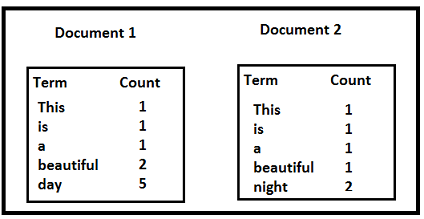

```
TF('beautiful',Document1) = 2/10, IDF('beautiful')=log(2/2) = 0
TF('day',Document1) = 5/10,  IDF('day')=log(2/1) = 0.30

TF-IDF('beautiful', Document1) = (2/10)*0 = 0
TF-IDF('day', Document1) = (5/10)*0.30 = 0.15
```

* <font color='red'>Question: Why 'day' has higher score than 'beautiful'?</font>
    * IDF gives more weightage to the words that are distinct

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer='word')
X_tfidf = tfidf_vect.fit_transform(corpus)
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())
print(X_tfidf.toarray())

(4, 41)
['aka', 'algorithm', 'analysis', 'analytics', 'create', 'data', 'do', 'externally', 'generate', 'gracefully', 'handle', 'hence', 'improvement', 'input', 'introduce', 'iterative', 'lancasterstemmer', 'language', 'learn', 'lot', 'machine', 'mining', 'nltk', 'nonenglish', 'normalize', 'paicehusk', 'porter', 'python', 'result', 'rule', 'save', 'see', 'set', 'snowballstemmers', 'stemmer', 'structure', 'suitable', 'text', 'transforms', 'unstructured', 'use']
[[0.         0.2515904  0.         0.         0.         0.
  0.         0.39416498 0.         0.         0.         0.
  0.         0.         0.         0.39416498 0.39416498 0.
  0.         0.         0.         0.         0.         0.
  0.         0.39416498 0.         0.         0.         0.3107642
  0.39416498 0.         0.         0.         0.2515904  0.
  0.         0.         0.         0.         0.        ]
 [0.21613143 0.13795389 0.21613143 0.21613143 0.         0.21613143
  0.         0.         0.         0.     

In [30]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
X_tfidf_df.head(10)

,aka,algorithm,analysis,analytics,create,data,do,externally,generate,gracefully,...,see,set,snowballstemmers,stemmer,structure,suitable,text,transforms,unstructured,use
0,0.000000,0.251590,0.000000,0.000000,0.000000,0.000000,0.000000,0.394165,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.251590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.216131,0.137954,0.216131,0.216131,0.000000,0.216131,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.216131,0.216131,0.648394,0.216131,0.216131,0.000000
2,0.000000,0.171729,0.000000,0.000000,0.000000,0.000000,0.269047,0.000000,0.000000,0.269047,...,0.269047,0.000000,0.000000,0.171729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.301115,0.000000,0.000000,0.000000,0.301115,0.000000,...,0.000000,0.301115,0.301115,0.192198,0.000000,0.000000,0.000000,0.000000,0.000000,0.301115


### Machine learning algorithms - a real example

In [31]:
from nltk.corpus.reader.wordnet import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

In [32]:
worddict = set(nltk.corpus.words.words())

In [33]:
len(worddict)

235892

In [34]:
def preprocessing(text):
    wordset_n = set(wn.lemmatize(w, NOUN) for w in word_tokenize(text.lower().strip()))
    wordset_v = set(wn.lemmatize(w, VERB) for w in wordset_n)
    wordset = set(wn.lemmatize(w, ADJ) for w in wordset_v)
    wordset = wordset & worddict
    return ' '.join(list(wordset))

In [35]:
data = pd.read_csv("tweets.csv") 
data['text']=data['Tweet'].apply(preprocessing)
data.head()

,ID,Tweet,emo,text
0,1,RT @AKINTUNDE_SEGUN: Earlier conversation toda...,sadness_depression,conversation between early and sen shame today...
1,2,@StanaTalkRadio Please promise another #SFF. I...,sadness_depression,mess to i please future will after this promis...
2,3,RT @northernprideuk: Only 88 days until #Newca...,exciting_2,excite until only day who
3,4,Music for moms: relaxation and stress relief h...,peace_relax,music relaxation and relax stress motherhood f...
4,5,I really love this! ~ Jade #Demi #demetria #de...,confidence_impress,i confident really this jade love demi


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 4 columns):
ID       1617 non-null int64
Tweet    1617 non-null object
emo      1615 non-null object
text     1617 non-null object
dtypes: int64(1), object(3)
memory usage: 50.7+ KB


In [37]:
x_train, x_test, y_train, y_test = train_test_split(
    data['text'],
    data['emo'],
    test_size=0.3,
    random_state=1)

#### There are many algorithms to choose from, first we will try basic Naive Bayes Classifier and train the model on the training set.

In [38]:
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer(use_idf=False) # just use tf, no idf used

# convert the text list to tfidf form matrix
x_train_counts = count_vect.fit_transform(x_train)
x_train_tf = tf_transformer.fit_transform(x_train_counts)
y_train = np.array(y_train)

clf = MultinomialNB(1.0, True, None)
clf.fit(x_train_tf, y_train) # train the classifier

# convert list to matrix
x_pre_counts = count_vect.transform(x_test)
x_pre_tf = tf_transformer.transform(x_pre_counts)

predicted = clf.predict(x_pre_tf)

In [39]:
x_train_tf

<1131x2211 sparse matrix of type '<class 'numpy.float64'>'
	with 11828 stored elements in Compressed Sparse Row format>

In [40]:
print(list(filter(lambda x: x>0, x_train_tf.toarray()[3])))

[0.4082482904638631, 0.4082482904638631, 0.4082482904638631, 0.4082482904638631, 0.4082482904638631, 0.4082482904638631]


#### Now the model is ready and trained. Now let us test the performance of our model on the test set to predict the emo labels.

In [41]:
metrics.accuracy_score(list(y_test), predicted)

0.8168724279835391

In [42]:
cm = confusion_matrix(list(y_test), predicted)
cm

array([[37,  0,  0,  0,  9,  1,  0,  0,  0],
       [ 0, 37,  0,  0,  7,  4,  0,  0,  1],
       [ 0,  0, 30,  0, 14,  2,  0,  1,  0],
       [16,  0,  1,  1,  7,  2,  0,  1,  2],
       [ 0,  0,  0,  0, 99,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8, 68,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  3,  2,  0, 62,  0],
       [ 0,  0,  0,  0,  6,  0,  0,  0, 63]], dtype=int64)

In [43]:
list(np.unique(list(y_test)))

['anger_2',
 'confidence_impress',
 'disappoint_2',
 'disgust_frustration',
 'exciting_2',
 'joy_2',
 'nan',
 'peace_relax',
 'sadness_depression']

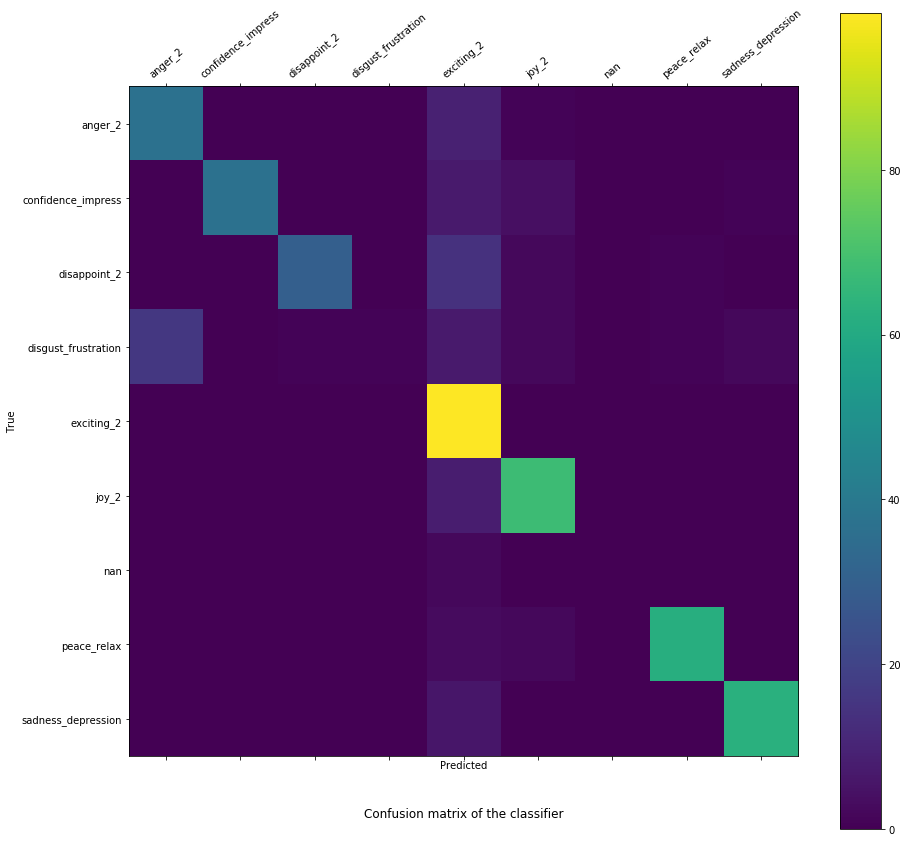

In [44]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
labels=list(np.unique(list(y_test)))
plt.title('Confusion matrix of the classifier', y=-0.1)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, rotation=40)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Parameter estimation using grid search with cross-validation

* Grid-search: 
    - It exhaustively searches overall parameter combinations in a given grid to determine the best model.
* Cross-validation: 
    - It divides a data set into k subsets and repeat the method k times where a different subset is used as the test set i.e in each iteration.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [46]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(x_train_tf, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,2.465789,0.026884,0.078132,5.560829e-07,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.982456,0.951754,0.951542,0.973333,0.968610,0.965517,0.012217,1
11,2.625174,0.159355,0.090633,2.073093e-02,None,300,"{'max_depth': None, 'n_estimators': 300}",0.969298,0.951754,0.951542,0.973333,0.973094,0.963749,0.010031,2
4,1.175078,0.006250,0.037502,7.655629e-03,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.969298,0.942982,0.955947,0.977778,0.968610,0.962865,0.012182,3
5,2.350156,0.015935,0.075006,1.169177e-02,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.978070,0.951754,0.947137,0.977778,0.959641,0.962865,0.012940,3
7,1.221957,0.011693,0.043752,6.250429e-03,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.969298,0.956140,0.955947,0.968889,0.964126,0.962865,0.005882,3


In [47]:
gs_fit

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [48]:
gs_fit.cv_results_

{'mean_fit_time': array([0.06875558, 0.9156858 , 1.84699636, 0.08125601, 1.17507811,
        2.35015631, 0.08125596, 1.22195683, 2.46578894, 0.08750572,
        1.24383249, 2.6251739 ]),
 'std_fit_time': array([0.00765438, 0.00765543, 0.01169332, 0.00625045, 0.00625029,
        0.01593466, 0.00625036, 0.01169324, 0.02688408, 0.00765407,
        0.02119482, 0.15935529]),
 'mean_score_time': array([0.00312481, 0.03750262, 0.06563005, 0.00625038, 0.03750215,
        0.07500615, 0.00624962, 0.04375229, 0.07813177, 0.00312471,
        0.04062829, 0.09063272]),
 'std_score_time': array([6.24961853e-03, 7.65553154e-03, 6.25092995e-03, 7.65512274e-03,
        7.65562890e-03, 1.16917745e-02, 7.65418828e-03, 6.25042916e-03,
        5.56082906e-07, 6.24942780e-03, 7.65481128e-03, 2.07309322e-02]),
 'param_max_depth': masked_array(data=[30, 30, 30, 60, 60, 60, 90, 90, 90, None, None, None],
              mask=[False, False, False, False, False, False, False, False,
                    False, False

#### How to select the best model

* mean_test_score is the mean accuracy of your classification.
* The mean_test_score for n_estimators=150 and max_depth=60 gives the best result mean_test_score=0.968170. 
    - Where n_estimators is the number of trees in the forest.
    - max_depth is the max number of levels in each decision tree.

In [49]:
clf = RandomForestClassifier(n_estimators=150, max_depth=60, random_state=0)
clf.fit(x_train_tf, y_train)
predicted = clf.predict(x_pre_tf)
metrics.accuracy_score(list(y_test), predicted)

0.9753086419753086

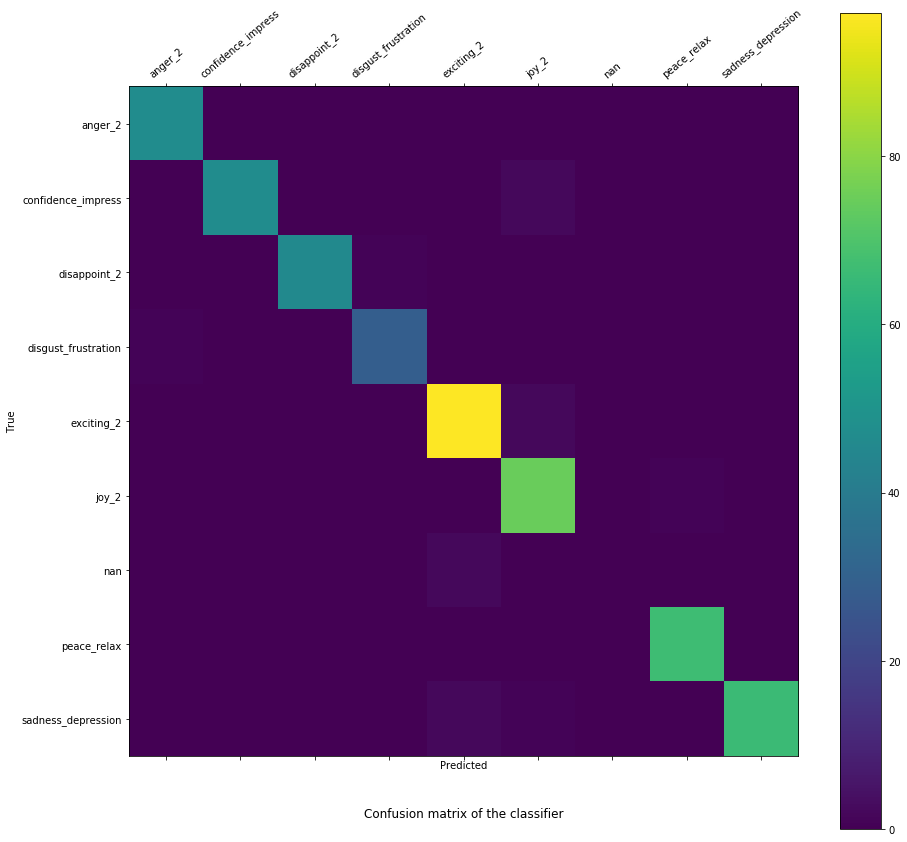

In [50]:
cm = confusion_matrix(list(y_test), predicted)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
labels=list(np.unique(list(y_test)))
plt.title('Confusion matrix of the classifier', y=-0.1)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels, rotation=40)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

References:

https://github.com/lapolonio/machine-learning-for-nlp-guide

https://towardsai.net/p/data-mining/text-mining-in-python-steps-and-examples-78b3f8fd913b

https://towardsai.net/p/data-mining/text-mining-in-python-steps-and-examples-78b3f8fd913b

https://monkeylearn.com/text-analysis/

https://blog.parse.ly/post/7790/machine-learning-nlp-parse-ly-currents/

https://devopedia.org/part-of-speech-tagging

https://medium.com/@tusharsri/nlp-a-quick-guide-to-stemming-60f1ca5db49e

https://www.linguamatics.com/what-text-mining-text-analytics-and-natural-language-processing

https://github.com/keighrim/python-nlp-ml-tutorial/blob/master/NLTK.ipynb

https://towardsdatascience.com/natural-language-processing-nlp-for-machine-learning-d44498845d5b

https://github.com/BadreeshShetty/Natural-Language-Processing-NLP-for-Machine-Learning/blob/master/NLP.ipynb

https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958

https://en.wikipedia.org/wiki/Tf%E2%80%93idf

https://www.machinelearningplus.com/nlp/lemmatization-examples-python/
